# MEMO Tutorial 1 TSDA 2020

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import pandas as pd
import numpy as np
from astropy.io import fits

## Question 1
### Sunspot data

a) Lightcurve and b) running mean


In [35]:
ss = pd.read_csv("/Users/vanessa/lecturing/nassp_msc/TSDA/data_and_plots/zuerich-monthly-sunspot-numbers-.csv",\
                      names = ["YM", "Number"], header = None, skiprows = 1, parse_dates=True)

In [37]:
ss.YM = pd.to_datetime(ss.YM,format="%Y-%m")
pd.DataFrame.head(ss)

,YM,Number
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


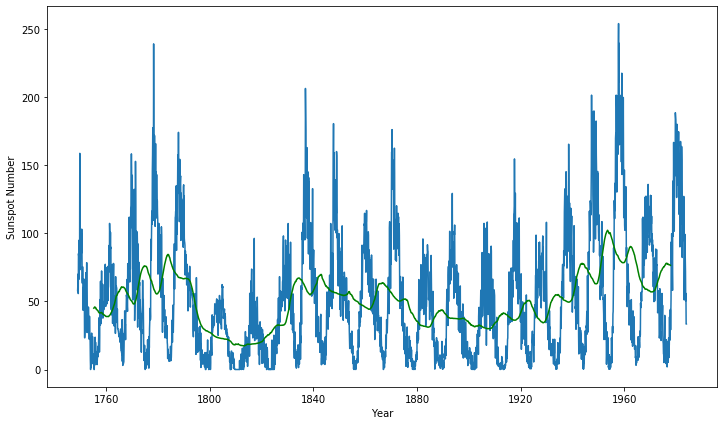

In [60]:
roll_ss = ss.Number.rolling(window = 150, center = True).mean()
plt.figure(figsize=(12,7))
plt.plot(ss.YM,ss.Number,ss.YM, roll_ss,'green')
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.show()

c) Mean & Variance

In [26]:
print("Mean = ",ss.Number.mean())
print("Variance = ",ss.Number.var())

Mean =  51.26595744680852
Variance =  1887.8131081642057


d) Histogram & e) mode of sampling

In [45]:
# diff Calculates the difference of a DataFrame element compared with another element in the DataFrame 
# (default is the element in the same column of the previous row)
tdeltas = ss['YM'].diff() / np.timedelta64(1, 'D')

In [50]:
tdeltas.head()

0     NaN
1    31.0
2    28.0
3    31.0
4    30.0
Name: YM, dtype: float64

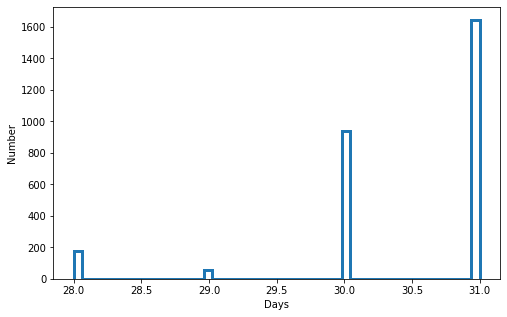

In [58]:
plt.figure(figsize=(8,5))
plt.hist(tdeltas,bins=50,histtype='step',lw=3) #histograming the time
plt.xlabel("Days")
plt.ylabel("Number")
plt.show()

In [59]:
print("Mode of sampling: 31 days")

Mode of sampling: 31 days


f) The time series extends over two hundred years and shows the sunspot number sampled at monthly intervals. The series itself shows regular variations in the sunspot number at a period of roughly ten years.

### Optical data of Be X-ray binary
a) Lightcurve and b) running mean

In [63]:
xrb = pd.read_csv("~/ownCloud/TimeSeries_2020/data/F86_ogle234.dat",\
                      names = ["Day", "Mag", "Magerr"], header = None, skiprows = 1)

In [65]:
pd.DataFrame.head(xrb)

,Day,Mag,Magerr
0,466.53924,14.917,0.003
1,466.54834,14.916,0.003
2,466.56358,14.909,0.003
3,466.59417,14.909,0.003
4,466.62371,14.917,0.003


In [74]:
roll_xrb = xrb.Mag.rolling(window = 80, center = True).mean()

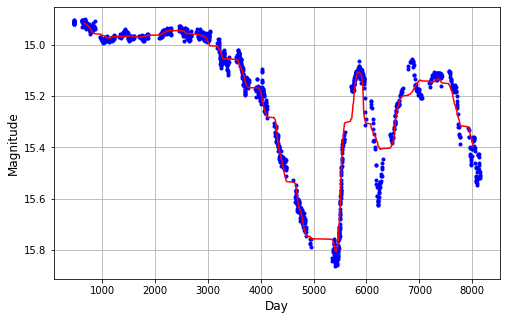

In [75]:
plt.figure(figsize=(8,5))
plt.plot(xrb.Day,xrb.Mag,'b.',xrb.Day,roll_xrb,'red')
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Day",fontsize=12)
plt.ylabel("Magnitude",fontsize=12)
plt.show()

c) Mean and Variance

In [76]:
print("Mean XRB = ", xrb.Mag.mean())
print("Variance XRB = ", xrb.Mag.var())

Mean XRB =  15.18084104389088
Variance XRB =  0.0678893907416992


d) Histogram & e) Mode of sampling

In [144]:
tdeltas = xrb['Day'].diff()

my_bins=np.arange(200)

plt.figure(figsize=(8,5))
n, bins, patches = plt.hist(tdeltas,my_bins)
plt.xlim(0,200)
plt.show()

NameError: name 'xrb' is not defined

In [93]:
print("Mode of sampling: ", bins[np.where(n==np.max(n))])
print("The mode of sampling is between 1 and 2 days.")
#bins indexed by left boundary

Mode of sampling:  [1]
The mode of sampling is between 1 and 2 days.


f) The time series extends over approximately 8000 days and shows variation in brightness of an X-ray binary. There is no obvious periodicity visible, but there are large fluctuations (of almost 1 magnitude) in brightness.

### COVID-19 dataset
a) lightcurve and b) rolling mean

In [2]:
covid = pd.read_csv("~/lecturing/nassp_msc/TSDA/data_and_plots/time_series_2019_ncov_confirmed.csv")
pd.DataFrame.head(covid)

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,...,02/05/20 9:00,02/05/20 23:00,02/06/20 9:00,02/06/20 14:20,02/07/20 20:13,02/07/20 22:50,02/08/20 22:04,02/08/20 23:04,02/09/20 10:30,02/09/20 23:20
0,Anhui,Mainland China,31.82571,117.2264,NaN,1.0,9.0,15.0,15.0,39.0,...,530.0,591.0,591.0,591.0,665,733,733,779,779,830
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,...,253.0,274.0,274.0,274.0,297,315,315,326,326,337
2,Chongqing,Mainland China,30.05718,107.8740,5.0,6.0,9.0,27.0,27.0,57.0,...,376.0,389.0,400.0,400.0,415,426,428,446,450,468
3,Fujian,Mainland China,26.07783,117.9895,NaN,1.0,5.0,5.0,10.0,10.0,...,205.0,215.0,215.0,215.0,224,239,239,250,250,261
4,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,2.0,2.0,2.0,4.0,...,57.0,62.0,62.0,62.0,67,71,79,79,79,83


In [4]:
only_num = covid.iloc[: ,4:] #choose on
new = only_num.sum(axis=0) #sum all the rows, preserving the columns

a = new.reset_index() #reset_index tells it to use the timestamp as a column instead of an index
a.columns = ['time','number']
a.time = pd.to_datetime(a.time,format="%m/%d/%y %H:%M")

pd.DataFrame.head(a) 

,time,number
0,2020-01-21 22:00:00,330.0
1,2020-01-22 12:00:00,555.0
2,2020-01-23 12:00:00,654.0
3,2020-01-24 00:00:00,881.0
4,2020-01-24 12:00:00,941.0


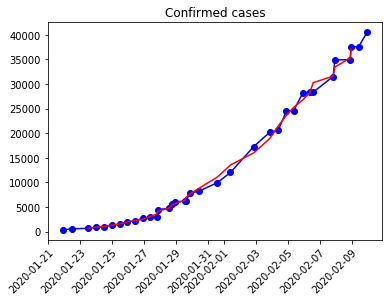

In [13]:
roll_covid = a.number.rolling(window =5, center = True).mean()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(a.time,a.number,'bo-',a.time,roll_covid,'red')
plt.title("Confirmed cases")
#ax.set_xticklabels(a.time.format,rotation=45 )
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()

c) Mean and Variance

In [14]:
print("Mean = ", a.number.mean())
print("Variance = ",a.number.var())

Mean =  13867.055555555555
Variance =  180534845.59682536


d) histogram

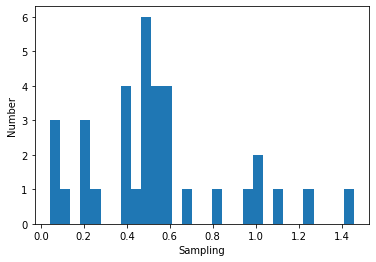

In [18]:
tdeltas = a['time'].diff() / np.timedelta64(1, 'D')

plt.hist(tdeltas,bins=30)
plt.xlabel("Sampling")
plt.ylabel("Number")
plt.show()

e) The mode of the sampling is half a day

f) The time series is the number of confirmed cases of COVID-19. It shows an exponential increase with time, and is sampled at approximatey half day intervals.

### GX304-1
a) Lightcurve and b) running mean

In [20]:
hdulist=fits.open('../data_and_plots/gx304m1.fits')
hdulist.info()

Filename: ../data_and_plots/gx304m1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   ()      
  1  Orbital Elements    1 BinTableHDU     58   1R x 14C   [24A, D, D, A, D, D, A, D, D, D, D, D, D, D]   
  2  PSR_HIST      1 BinTableHDU     61   1159R x 15C   [D, D, D, I, D, D, D, D, D, D, D, D, D, D, I]   


In [21]:
data = hdulist[2].data
cols = hdulist[2].columns
print(cols)

ColDefs(
    name = 'TSTART'; format = 'D'
    name = 'TSTOP'; format = 'D'
    name = 'PSRTIME'; format = 'D'
    name = 'DETECTED'; format = 'I'
    name = 'FREQUENCY'; format = 'D'
    name = 'FREQUENCY_ERR'; format = 'D'
    name = 'FMIN'; format = 'D'
    name = 'FMAX'; format = 'D'
    name = 'FDOT'; format = 'D'
    name = 'FDOT_ERR'; format = 'D'
    name = 'FDOTMIN'; format = 'D'
    name = 'FDOTMAX'; format = 'D'
    name = 'AMPLITUDE'; format = 'D'
    name = 'AMPLITUDE_ERR'; format = 'D'
    name = 'NUMHARM'; format = 'I'
)


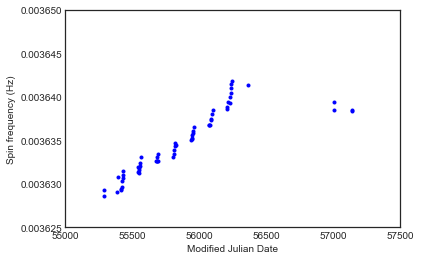

In [141]:
plt.plot(data['TSTART'],data['FREQUENCY'],'b.')
plt.ylim([0.003625,0.00365])
plt.xlim([55000,57500])
plt.xlabel('Modified Julian Date')
plt.ylabel("Spin frequency (Hz)")
plt.show()

c) running mean doesn't make too much sense here

c) mean and variance - might make more sense to remove all the zeros

In [101]:
a = np.where(data['FREQUENCY'] > 0.0)
print("Mean: ",np.mean(data['FREQUENCY'][a]))
print("Variance: ", np.var(data['FREQUENCY'][a]))

Mean:  0.003634811272350406
Variance:  1.3374776122247618e-11


d) Histogram of the sampling and mode)

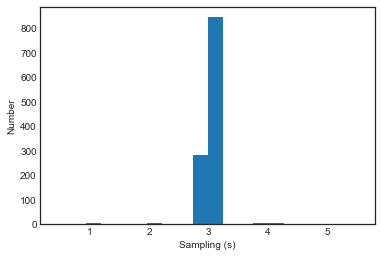

In [142]:
tdiff = data['TSTART'][1:] - data['TSTART'][0:-1]

plt.hist(tdiff,bins=20)
plt.xlabel("Sampling (s)")
plt.ylabel("Number")
plt.show()

Mode of sampling is at 3 seconds.

## Question 2
2.1 Detrend by using a moving average

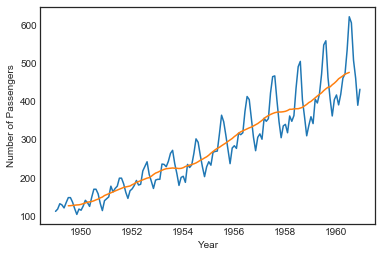

In [143]:
ap = pd.read_csv("~/lecturing/nassp_msc/TSDA/data_and_plots/AirPassengers.csv")

roll_mn = ap.AirPassengers.rolling(window=12,center = True).mean()


plt.plot(ap.time,ap.AirPassengers, ap.time, roll_mn)
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

Window chosen as 12 because the data is sampled monthly, and using the window as 12 months means we average over the seasonal varaition in air passenger numbers

2.2 Detrend with running mean

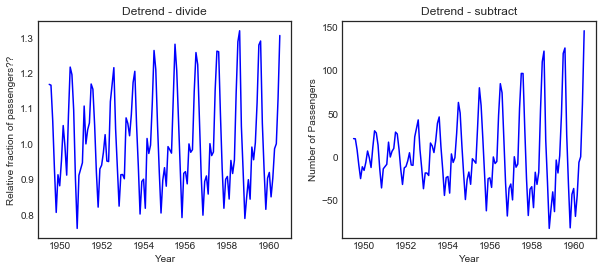

In [151]:
detrend_div = ap.AirPassengers/roll_mn
detrend_sub = ap.AirPassengers - roll_mn

ax = plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(121)
plt.plot(ap.time, detrend_div,'b')
plt.xlabel("Year")
plt.ylabel("Relative fraction of passengers??")
plt.title("Detrend - divide")
plt.subplot(122)
plt.plot(ap.time, detrend_sub,'b')
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.title("Detrend - subtract")
plt.show()

The plots above show the difference in dividing by the trend or subtracting out the trend. What one decides on doing is dependent on how you plan to use the dataset.

## Question 3
__Coding your own running mean__

In [152]:
def my_runmean(y,window):
    
    rmean = np.zeros_like(y)
    
    y = np.asarray(y)
    
    for i in range(0, len(y)-1-window):
        # This is a forward running mean, so the last "window" data points are odd
        # It just takes adjacent point, doesn't care about gaps 
        rmean[i] = np.mean(y[i:i+window])
    
    for i in range(len(y-window), len(y)-1):
        rmean[i] = -99.99
    
    return rmean

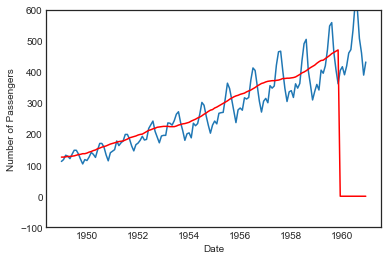

In [153]:
b = my_runmean(ap.AirPassengers,12)

plt.plot(ap.time,ap.AirPassengers)
plt.plot(ap.time,b,color='red')
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.ylim(-100,600)
plt.show()

This implementation is a forward running mean, so it takes _n_ data points ahead of the current one to calculate the running mean. For an increasing dataset, like this one, that means it tends to overestimate the mean. It also means that there is no good value of the running mean for the last _n_ data points (i.e. the ones I've set to -99.99). Can you think of a better way of doing this?

## Question 4
__Sunspot data__
a)

In [154]:
print(ss.YM[0])
print(pd.DataFrame.tail(ss.YM, 1))

1749-01-01 00:00:00
2819   1983-12-01
Name: YM, dtype: datetime64[ns]


First data point: 1 Jan 1749

Last data point: 1 Dec 1983

Frequency of data: monthly

(b) Extract the portion between April 1973 and December 1975. Resample quarterly and plot.

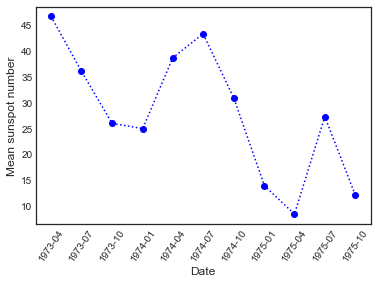

In [155]:
# Set the YM column as the index for the Data Frame and then select data between key dates.

ss.index = ss['YM']
sample = ss.loc['1973-04-01':'1975-12-01']


# There are many different ways to do this. 
# To resample quarterly you need to average over every 3 months,
# so you'll go from len(df_sample) = 33 data points down to 11 data points

b = sample.resample('Q', label='left').mean()

# Now, set the index back to a column to allow plotting
newb = b.reset_index()

plt.plot(newb.YM, newb.Number,'bo',ls=':')
plt.xlabel("Date",fontsize="12")
plt.ylabel("Mean sunspot number",fontsize="12")
plt.tick_params(axis='x',labelrotation=55)
plt.show()

You will notice that in $\texttt{newb}$ the dates correspond to the very start of the quarterly interval. It may be more appropriate to generate a new set of dates corresponding to the middle of the quarterly intervals we are averaging over.

c) For the full dataset generate the ACF and plot it.

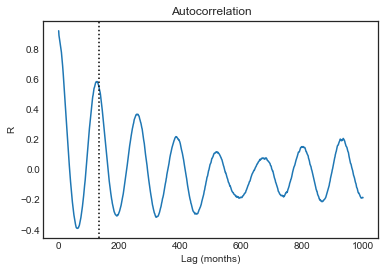

In [156]:
#I've investigated lags up to 1000 months.
# Overplotted a dotted line at the 11 year sunspot cycle

acf = np.zeros(1000);lag = np.arange(1,1001)

for i in lag:
    acf[i-1] = ss.Number.autocorr(lag=i)
    

plt.plot(lag,acf)
plt.xlabel("Lag (months)")
plt.ylabel("R")
plt.title("Autocorrelation")
plt.axvline(132,ls=":",color='black')
plt.show()

(d) Plot the full dataset against a copy that is lagged by one month:

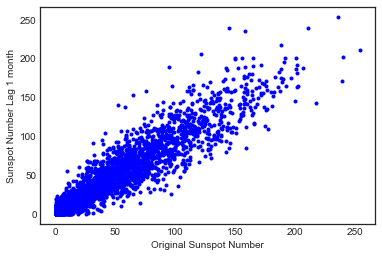

In [157]:
#lag1 = ss.shift(1) You could also implement the lag with this shift command
plt.plot(ss.Number[0:-1],ss.Number[1:],'b.')
plt.xlabel("Original Sunspot Number")
plt.ylabel("Sunspot Number Lag 1 month")
plt.show()

Strongly-correlated because the data are basically plotted againt themselves.

(e) plot the time series against a copy that is lagged by 11 years.

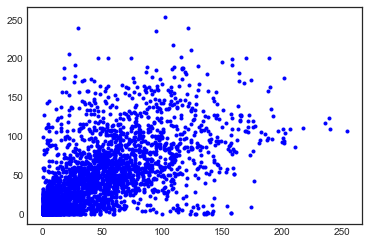

In [159]:
n_lag = 11*12
len(ss.Number)
plt.plot(ss.Number[0:len(ss.Number)-n_lag],ss.Number[n_lag:],'b.')
plt.show()

It's not as good a correlation as above, but there does seem to be some correlation - hopefully what you'd expect if the sunsport cycle repeats every 11 years.

It's probably useful to make a comparsion when you plot the time series against a copy of itself lagged by 2 years. See below - pretty uncorrelated.

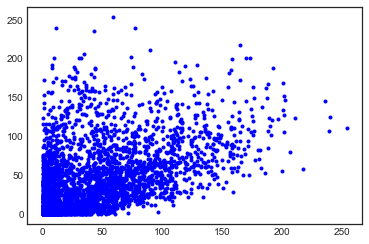

In [160]:
n_lag = 2*12
len(ss.Number)
plt.plot(ss.Number[0:len(ss.Number)-n_lag],ss.Number[n_lag:],'b.')
plt.show()

(e) What do these plots suggest about the stationarity of the data?

The ACF shows that the sunspot number is not stationary. The alternating nature of the ACF shows the seasonality (approx 11 years = 132 months) of the sunspot cycle. 

The lag by one month plot shows a correlation, suggesting that there's not much variation on a 1 month timescale.

## Question 5
5.1 Sunspot number vs Phase


In [102]:
from astropy.time import Time

In [103]:
time_arr = ss.YM.to_numpy()
print(time_arr)

['1749-01-01T00:00:00.000000000' '1749-02-01T00:00:00.000000000'
 '1749-03-01T00:00:00.000000000' ... '1983-10-01T00:00:00.000000000'
 '1983-11-01T00:00:00.000000000' '1983-12-01T00:00:00.000000000']


In [104]:
t = Time(time_arr)
print(t.jd)

[2359869.5 2359900.5 2359928.5 ... 2445608.5 2445639.5 2445669.5]


In [106]:
# 11 year sunspot cycle converted to days
period = 11 * 365.25
# Make the phase array
phase = (t.jd - t[0].jd)/period
dec_phase = phase - np.floor(phase)

In [112]:
# OR A SIMPLER WAY JUST USING THE RESIDUALS
# 11 Year sunspot cycle converted to days
period = 11 * 365.25

# Make the phase array
phase2 = ((t.jd - t[0].jd)%period)/period

dec_phase = phase - np.floor(phase)

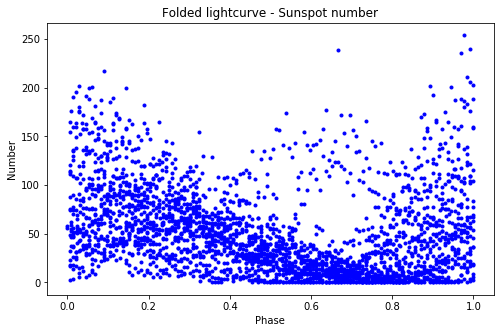

In [118]:
plt.figure(figsize=(8,5))
plt.plot(phase2,ss.Number,'b.')
plt.xlabel("Phase")
plt.ylabel("Number")
plt.title("Folded lightcurve - Sunspot number")
plt.show()

5.2 Sunspot number vs Phase - binned

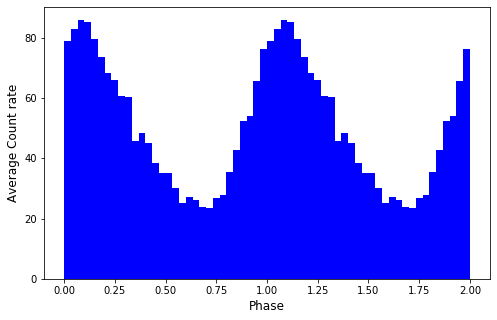

In [123]:
nbins = 30                  # chosen number of bins across the period
bwidth = 1.0/float(nbins)   # calculate the width of the bins

# create arrays for bin values
bins = np.zeros(nbins)
n_per_bin = np.zeros(nbins)

# do the binning in a for loop
for i in range(len(ss.Number)):
    n = int(phase2[i] / bwidth) # calculate bin number for this value
    bins[n] += ss.Number[i]    # add value to bin 
    n_per_bin[n] += 1


#Average count rates per bin
ave_count_rate = bins/n_per_bin

binEdges = np.arange(nbins) * bwidth     # create array of bin edge values for plotting

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(binEdges + bwidth/2, ave_count_rate, bwidth,color='Blue')
rects2 = ax.bar(binEdges + bwidth/2 + 1, ave_count_rate, bwidth,color='Blue')
ax.set_xlabel("Phase", fontsize = 12)
ax.set_ylabel("Average Count rate", fontsize = 12)
plt.show()